# Customer Conversion Prediction

##  Problem Statement


#### You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.  

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")  

In [4]:
df=pd.read_csv('D:/program session/project/Customer conversion prediction/train.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# Basic Analysis of Dataset from Problem Statement and Features

### 1.t is a supervised learning problem - We are predicting target variable

### 2.From target varible we can clearly understand it is a classification problem

### 3.From target Y = (yes/no) 2category only so we can use binary problem

# Analysis of Dataset 

In [5]:
#finding the column names
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [6]:
#Basic statistical analysis of dataset
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [7]:
#checking for the data is balanced or not
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

target variable is inbalanced majority is "NO"

# Data Cleaning

### Missing Value

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

###### No missing value in the data set

### Duplicates 

In [9]:
df.duplicated().sum()

6

In [15]:
#drop the duplicate
df = df.drop_duplicates()


In [16]:
df.duplicated().sum()

0

##### Successfully Remove duplicates

### Checking Data Type 

In [17]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

##### No wrong Format

### Text Errors For Categorical columns

In [19]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']

#### Jop

In [20]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [21]:
# droping the column unknown 
#outof 45211 rows, deletion of 288 rows will not get more impact on dataset so planning to delete

#replacing unknown value as null
df['job'] =df['job'].replace('unknown',np.nan)

In [22]:
#counting the no of null value in jab column
df.job.isnull().sum()
     

288

In [23]:
#removing null values from job column
df=df.dropna(subset=['job'])

In [24]:
#after removing null values checking for the summ of null vaues
df.job.isnull().sum()

0

#### marital 

In [25]:
df['marital'].value_counts()

married     27007
single      12720
divorced     5190
Name: marital, dtype: int64

#### education_qual 

In [26]:
df['education_qual'].value_counts()

secondary    23128
tertiary     13260
primary       6799
unknown       1730
Name: education_qual, dtype: int64

In [30]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((1730) / (23128+13260+6799+1730)) * 100 )

Percentage for "Unknown":  3.8515484115145715


Unknown percentage is 3.8% so if we delete also it will note affect the dataset

In [37]:
#replacing unknown value as null
df['education_qual'] =df['education_qual'].replace('unknown',np.nan)
     

In [38]:
#checking for null values
df.education_qual.isnull().sum()

1730

In [39]:
#remove the unknow value
df=df.dropna(subset=['education_qual'])


In [40]:
#after remove checking
df.education_qual.isnull().sum()

0

#### call_type


In [41]:
df['call_type'].value_counts()

cellular     28210
unknown      12283
telephone     2694
Name: call_type, dtype: int64

In [43]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((12283) / (28210+12283+2694)) * 100 )

Percentage for "Unknown":  28.441429133767105


Unknown call type percentage is 28.44% so we will keep as it is.if remove affect in dataset

#### Mon 

In [44]:
df['mon'].value_counts()

may    13191
jul     6600
aug     6035
jun     4978
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: mon, dtype: int64

#### prev_outcome 

In [45]:
df['prev_outcome'].value_counts()

unknown    35280
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

In [46]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((35280) / (35280+4709+1774+1424)) * 100 )
     

Percentage for "Unknown":  81.69124968161715


It is around 81% values are unknown. So will keep unknown value as it is.

#### Y  Target column

In [47]:
df['y'].value_counts()

no     38166
yes     5021
Name: y, dtype: int64

##### Converting categorical Target column into numerical column.

In [48]:
df['target'] = df["y"].map({"yes":1 , "no": 0})

In [51]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,0
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no,0


### Outlier Deduction and Correction

#### Outlier Detection

**1.IQR IQR = Q3(75%)-Q1(25%) Upper Threshold = Q3 + (1.5 * IQR) Lower Threshold = Q1 - (1.5 * IQR)**

**2.Plotting Box Plot**

#### Outlier Correction
**1.Deletion**

**2.Clip/Strip**

In [52]:
Num_cols = [var for var in df.columns if df[var].dtype == 'int64']
Num_cols

['age', 'day', 'dur', 'num_calls', 'target']

#### Age 

<Axes: xlabel='age'>

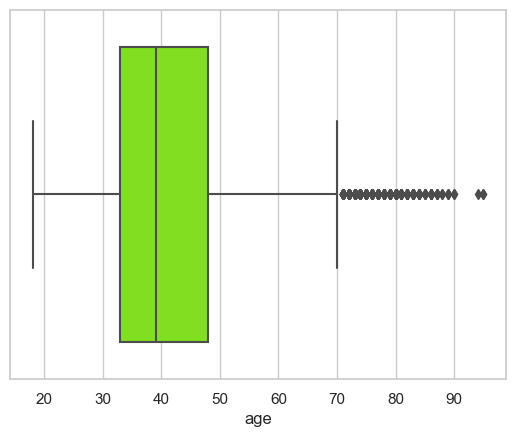

In [53]:
#Outlier Detuction using Box Plot for Age Column
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='Chartreuse')

In [54]:
#detecting Outlier for Age column
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


In [55]:
#removing outlier for age column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.age = df.age.clip(10.5,70.5)

In [56]:
df.age.describe()

count    43187.000000
mean        40.702549
std         10.305239
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

##### Checking- After outlier removal

<Axes: xlabel='age'>

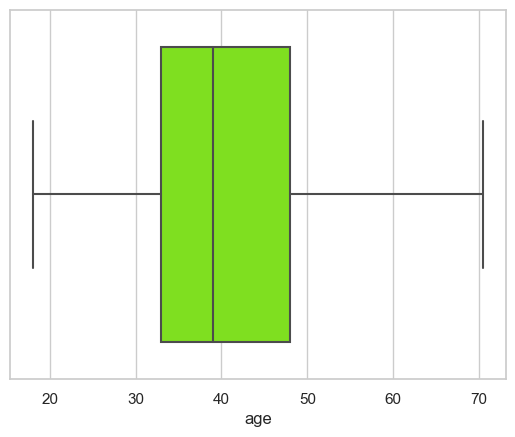

In [58]:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='Chartreuse')

### day

<Axes: xlabel='day'>

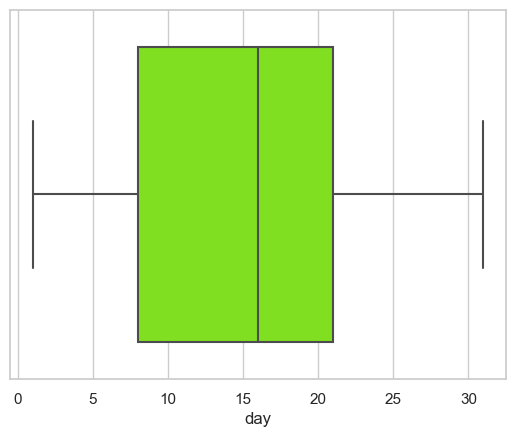

In [63]:
#Outlier Detuction using Box Plot for day Column
sns.set(style="whitegrid")
sns.boxplot(x=df['day'], color='Chartreuse')

In [69]:
q1,q3=np.percentile(df['day'],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper day bound:",upper,"Lower day bound :", lower)

Upper day bound: 40.5 Lower day bound : -11.5


In [65]:
df.day.describe()

count    43187.000000
mean        15.809896
std          8.305826
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

From Box plot itself we can tell there is no outlier, even though checked with IQR approach. min and max values are in between lower and upper bound.

### dur 

<Axes: xlabel='dur'>

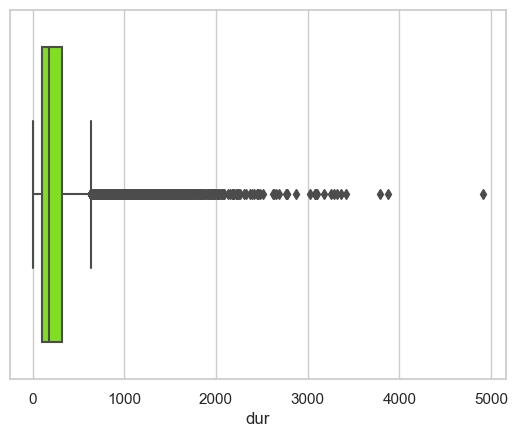

In [66]:
#Outlier Detuction using Box Plot for day Column
sns.set(style="whitegrid")
sns.boxplot(x=df['dur'], color='Chartreuse')

In [70]:
q1,q3=np.percentile(df['dur'],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print('upper dur found :',upper,'lower dur found:',lower)

upper dur found : 640.5 lower dur found: -219.5


In [72]:
df.dur.describe()

count    43187.000000
mean       258.344340
std        258.173244
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       4918.000000
Name: dur, dtype: float64

In [73]:
#removing outlier for age column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.dur=df.dur.clip(640.5,-219.5)

<Axes: xlabel='dur'>

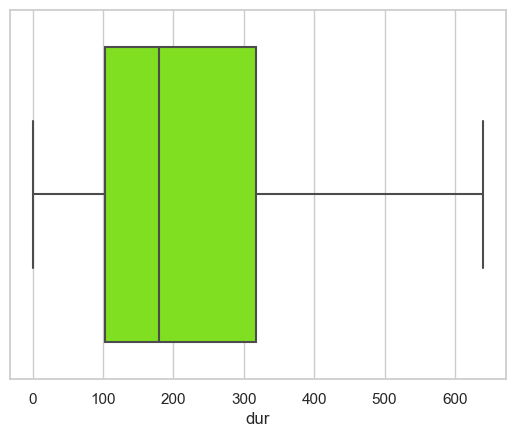

In [75]:
#checking after remove outlier
sns.set(style='whitegrid')
sns.boxplot(x=df['dur'],color='Chartreuse')

### num_cells 

<Axes: xlabel='num_calls'>

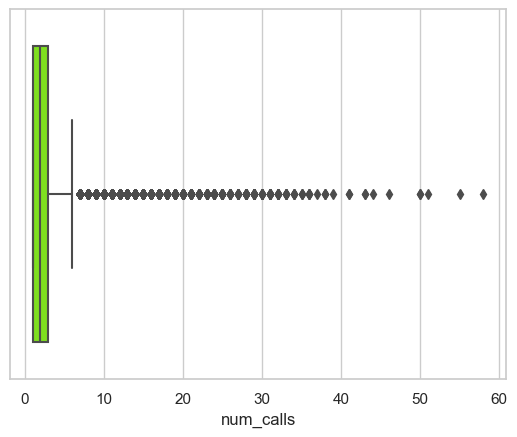

In [76]:
sns.set(style='whitegrid')
sns.boxplot(x=df['num_calls'],color='Chartreuse')

In [78]:
q1,q3=np.percentile(df['num_calls'],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print('upper num_calls found:',upper,'lower num_calls Found:',lower)

upper num_calls found: 6.0 lower num_calls Found: -2.0


In [79]:
#removing outlier for num_calls column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.num_calls = df.num_calls.clip(-2,6.0)

In [80]:
df.num_calls.describe()


count    43187.000000
mean         2.393081
std          1.598892
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

<Axes: >

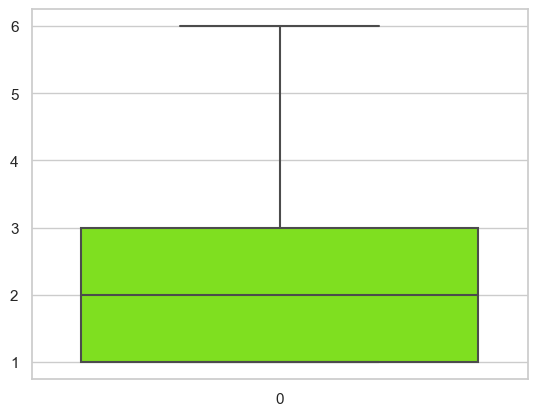

In [82]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='Chartreuse')

# EDA - Exploratory Data Analysis

The Hero of EDA is an important step in the data analysis process, as it helps to identify potential issues with the data and to develop a deeper understanding of the relationships between variables.

### Distribution of Feature and Target variable 

In [83]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,management,married,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,technician,single,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,entrepreneur,married,secondary,unknown,5,may,76.0,1,unknown,no,0
5,35.0,management,married,tertiary,unknown,5,may,139.0,1,unknown,no,0
6,28.0,management,single,tertiary,unknown,5,may,217.0,1,unknown,no,0


In [ ]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['job'],order=df['job'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('distribution according to job')

plt.subplot(432)
sns.countplot(df['marital'],order=df['marital'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('distribution according to marital')

plt.subplot(433)
sns.countplot(df['education_qual'],order=df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('education_qual')
plt.ylabel('Count')
plt.title('distributions according to education_qual')

plt.subplot(434)
sns.countplot(df['call_type'],order=df['call_type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('call_type')
plt.ylabel('Count')
plt.title('distributions according to call_type')

plt.subplot(435)
sns.countplot(df['mon'],order=df['mon'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('mon')
plt.ylabel('Count')
plt.title('distributions according to mon')

plt.subplot(436)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('prev_outcome')
plt.ylabel('Count')
plt.title('distributions according to prev_outcome')


plt.tight_layout()


## Features vs Target (categorical vs categorical)

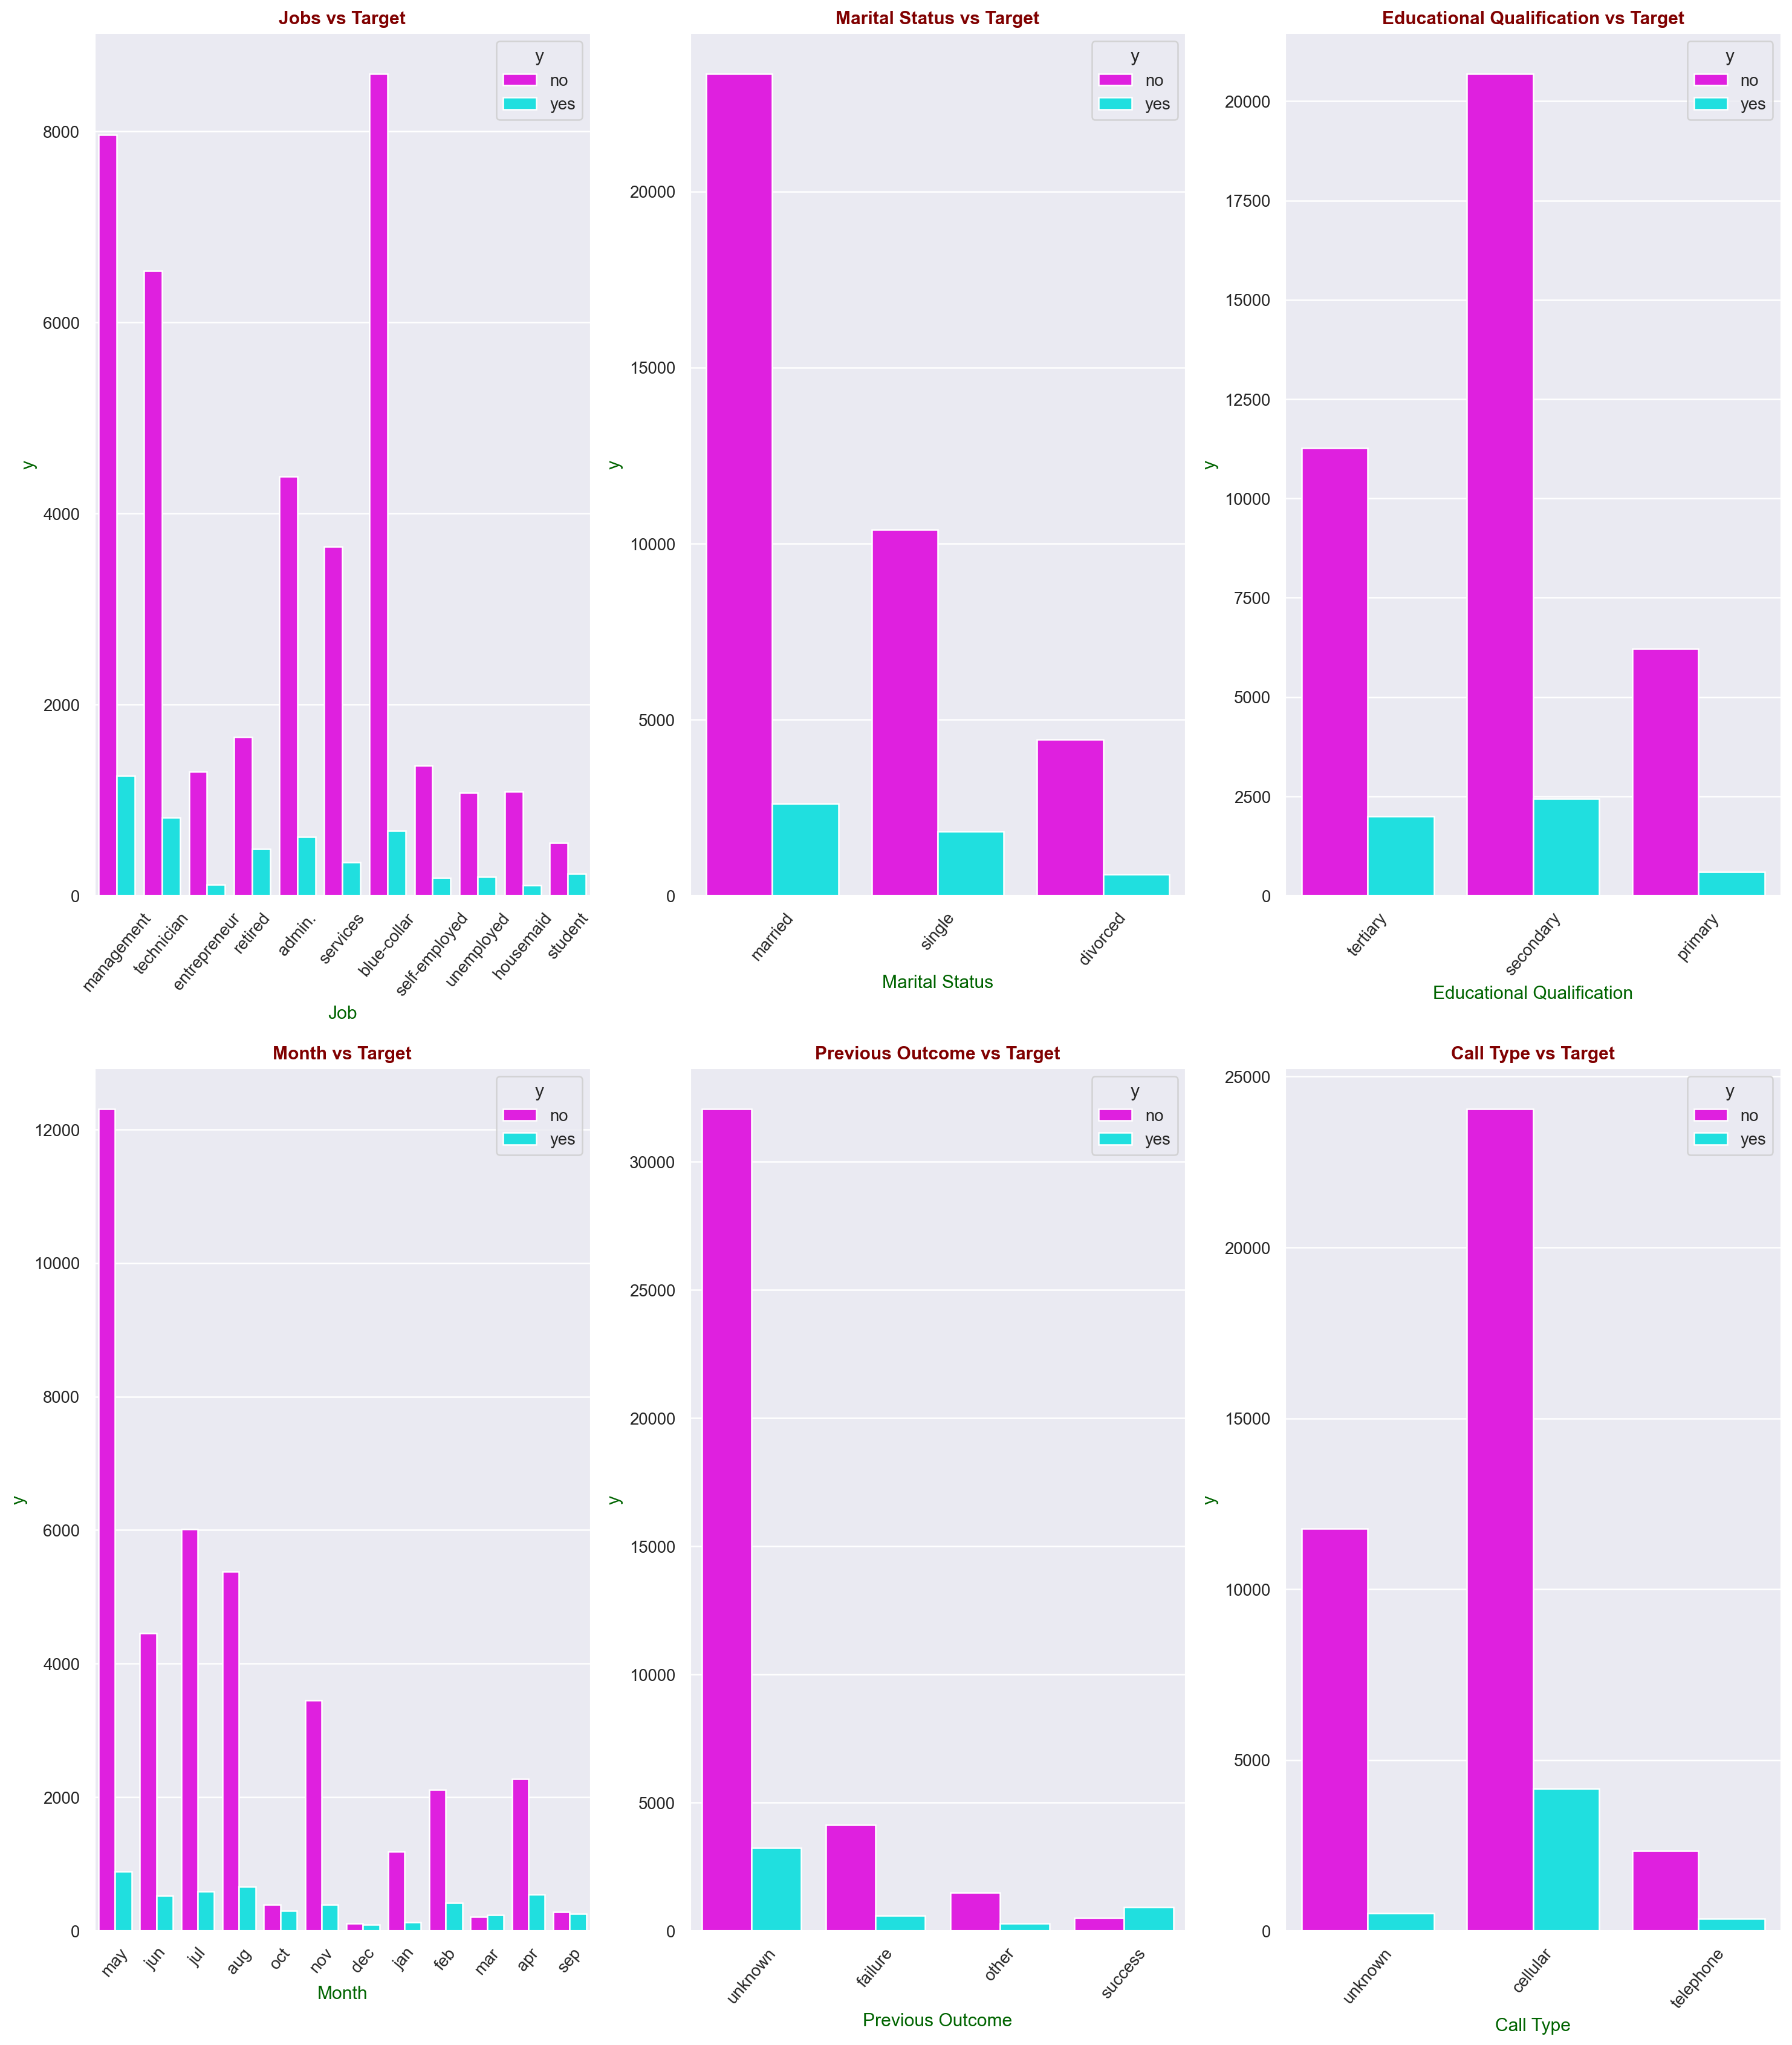

In [101]:
plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
plt.subplot(3,3,1)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='job',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='marital',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='education_qual',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='mon',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,5)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='prev_outcome',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,6)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='call_type',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()


##### Categorical Data Vs Target

#### Jobs vs Target
 1.Target (No) : Blue Collar
 
2.Suscribed (Yes): Management

#### Marital Status vs Target
1.Target (No) : Married

2.Subscribed (Yes): Married

#### Educational Qualification vs Target
 1.Target (No): Secondary
 
 2.Subscribed (Yes): Secondary

#### Month vs Target
 1.Target (No): May
 
 2.Subscribed (Yes): May

#### Previous Outcome vs Target
1.Target (No): unknown

2.Subscribed (Yes): unknown

#### Call Type vs Target
1.Target (No): Cellular

2.Subscribed (Yes): Cellular

## Features vs Target (continues vs categorical)

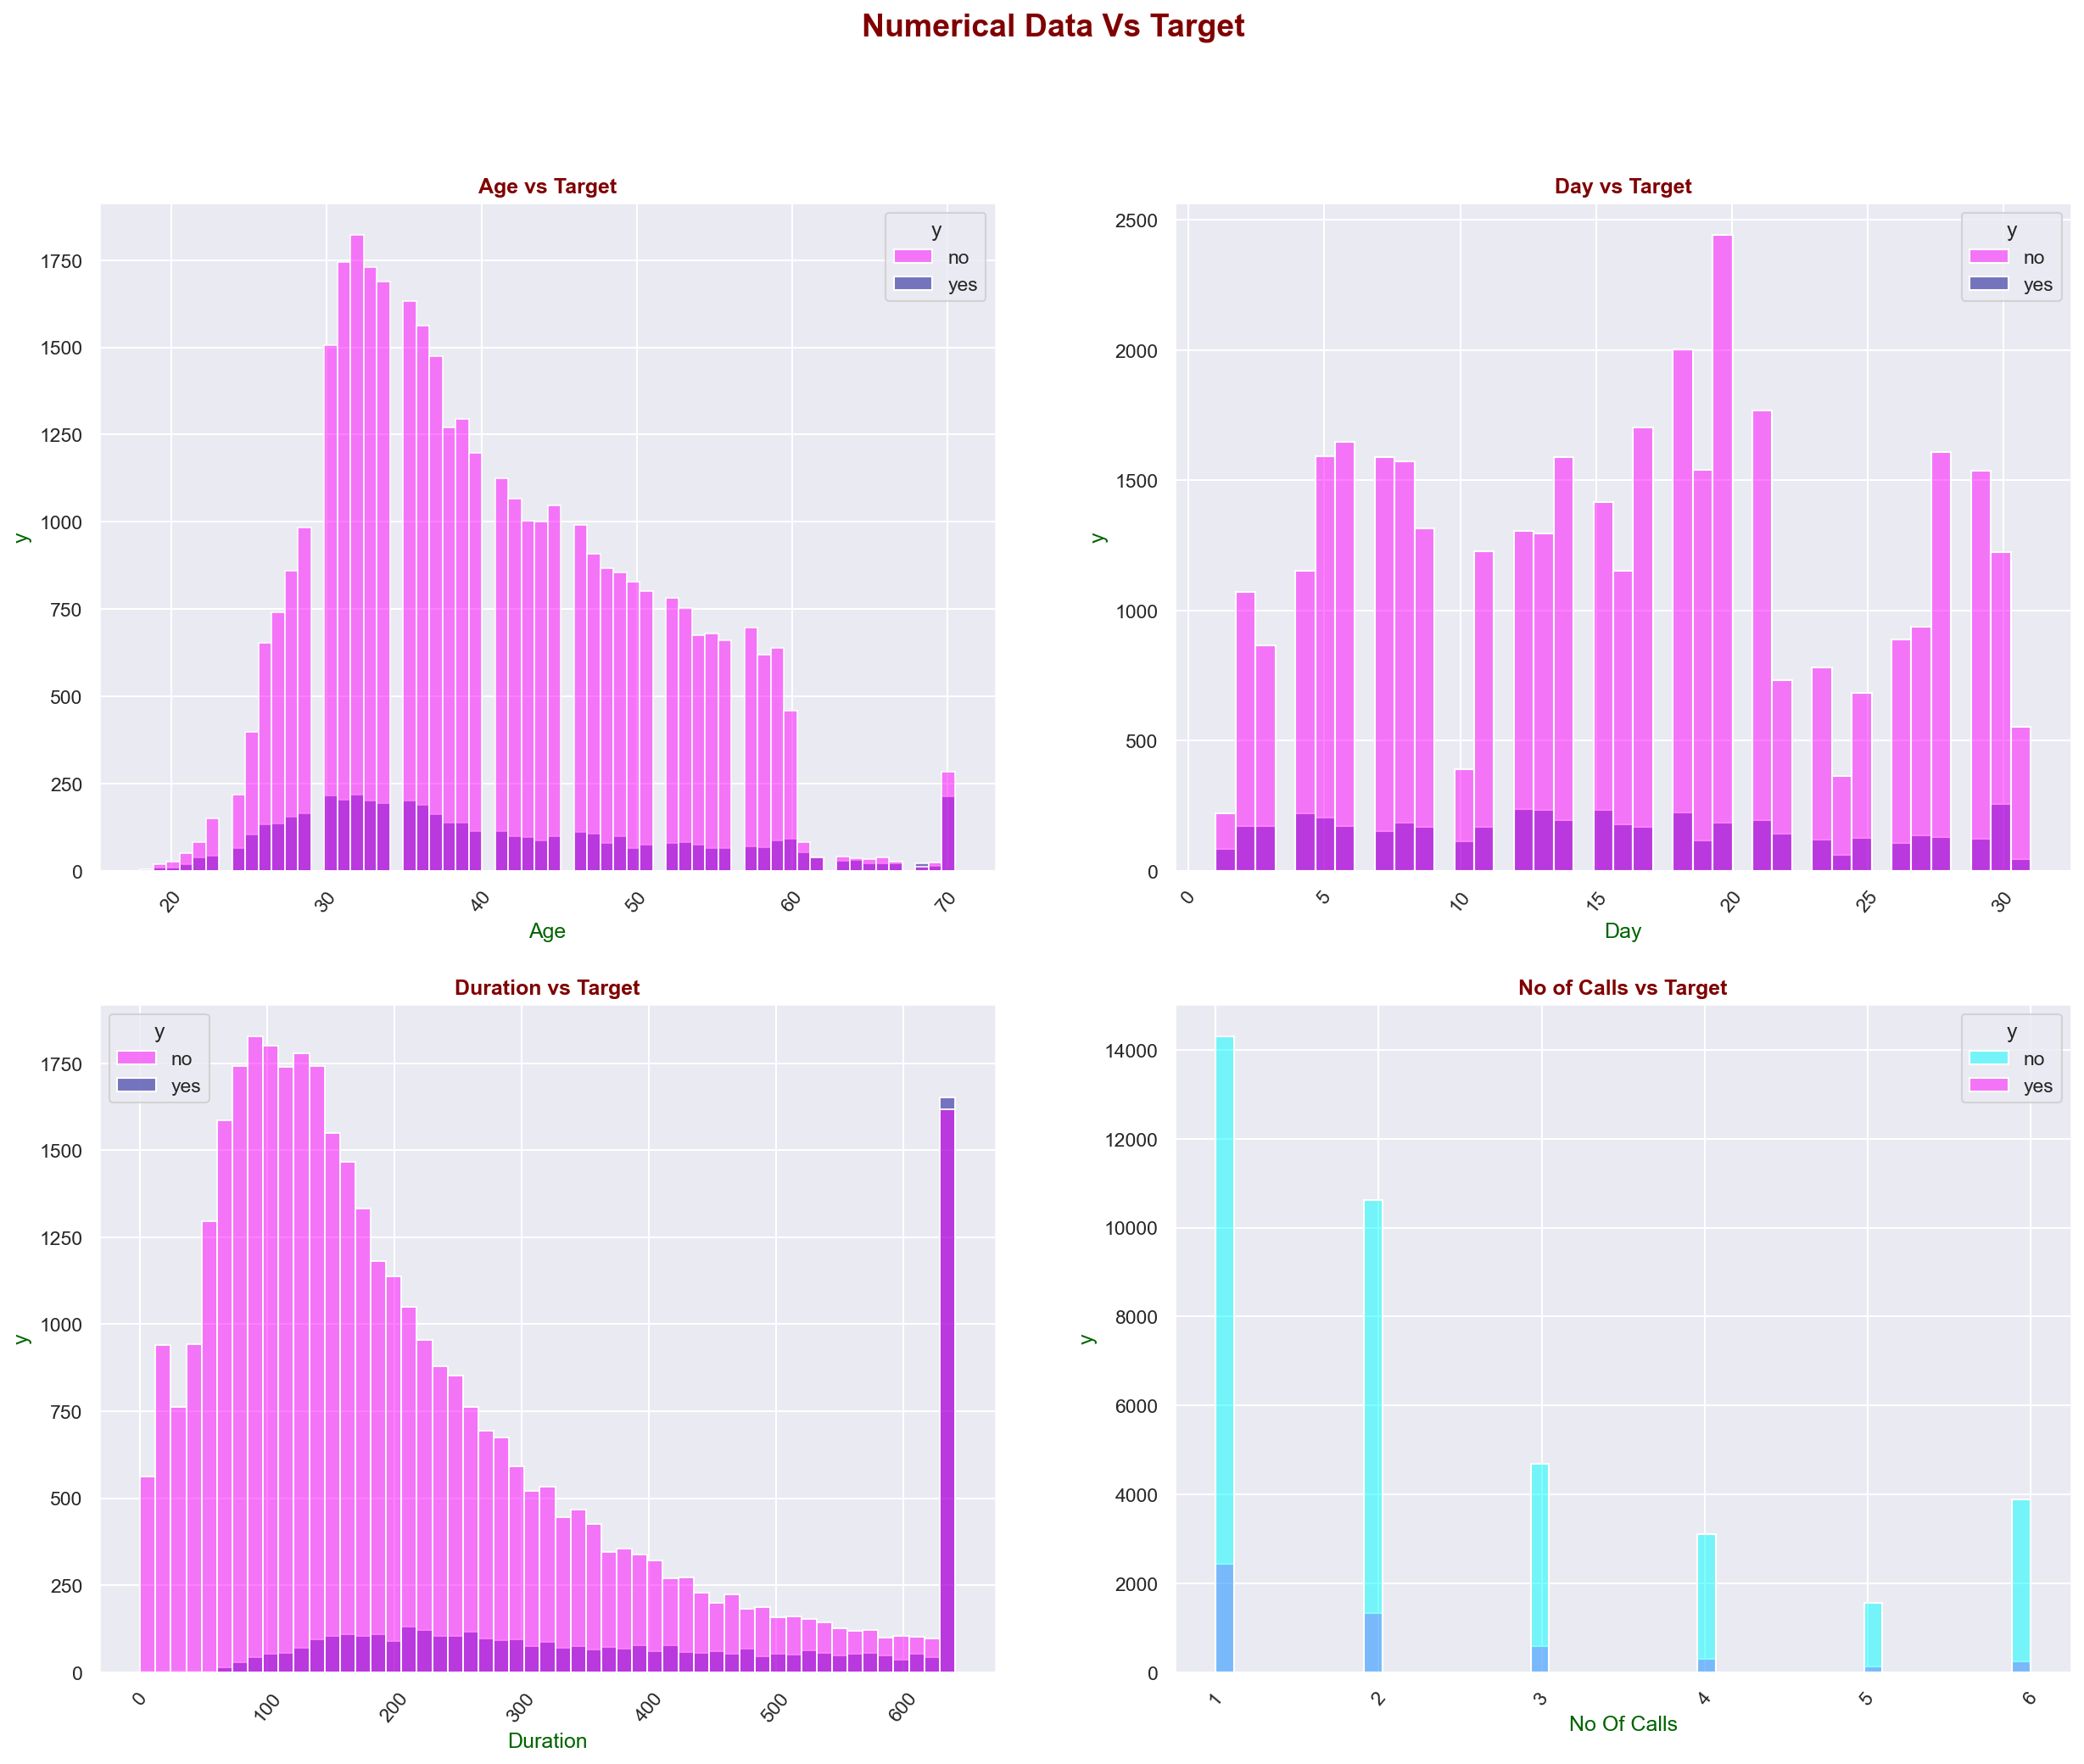

In [111]:
plt.figure(figsize=(20, 15), dpi=150)
#sub title to show title for overall plot 
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon') 

#Age vs Target
plt.subplot(2,2,1)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='age',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Age', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['age','target']].corr()

#Day vs Target
plt.subplot(2,2,2)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='day',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Day vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Day', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['day','target']].corr()

#Duration vs Target
plt.subplot(2,2,3)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='dur',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Duration vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Duration', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#No of Calls vs Target
plt.subplot(2,2,4)
my_colors = ['cyan', 'Magenta']
sns.histplot(x='num_calls',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('No of Calls vs Target', fontweight='bold', color='maroon' )
plt.xlabel('No Of Calls', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()

# Encoding

In [112]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [113]:
#Encoding for job column (Label Encoding)
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})   
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,married,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,single,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,married,secondary,unknown,5,may,76.0,1,unknown,no,0
5,35.0,8,married,tertiary,unknown,5,may,139.0,1,unknown,no,0
6,28.0,8,single,tertiary,unknown,5,may,217.0,1,unknown,no,0


In [114]:
#Encoding for Marital status (Label Encoding)
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,3,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,1,secondary,unknown,5,may,76.0,1,unknown,no,0


In [115]:
#encoding for educational qualification (Label Encoding)
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,3,2,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,1,2,unknown,5,may,76.0,1,unknown,no,0


In [116]:
# Encoding for month column (Label Encoding)
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,1,261.0,1,unknown,no,0
1,44.0,5,3,2,unknown,5,1,151.0,1,unknown,no,0
2,33.0,2,1,2,unknown,5,1,76.0,1,unknown,no,0


In [117]:
# Encoding for call type column (Label Encoding)
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,unknown,no,0
1,44.0,5,3,2,1,5,1,151.0,1,unknown,no,0
2,33.0,2,1,2,1,5,1,76.0,1,unknown,no,0


In [118]:
# Encoding for previous outcome column (Label Encoding)
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,1,no,0
1,44.0,5,3,2,1,5,1,151.0,1,1,no,0
2,33.0,2,1,2,1,5,1,76.0,1,1,no,0


# Spliting

In [119]:
# X --> Feature y-- > Target
x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['target'].values


In [123]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 30 )
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(34549, 10) (8638, 10) (34549,) (8638,)


# Balancing

In [124]:
#Balancing the data
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)
print(len(x_train_smt))
print(len(y_train_smt))
     

52568
52568


# Scaling

In [125]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# Modelling

### Logistic Regression 

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)
     

0.7740217642972911

In [127]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.9819091 , 0.0180909 ],
       [0.93401028, 0.06598972],
       [0.36954824, 0.63045176],
       ...,
       [0.43778267, 0.56221733],
       [0.69798639, 0.30201361],
       [0.48734912, 0.51265088]])

In [128]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auroc,2))

AUROC score for logistic regression  :   0.89


### K-Nearest Neighbour (KNN) 

In [131]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt) 
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))
     


K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8625851626539633
K value : 2 Train Score :  0.9952062091005935 Cross Value Accuracy : 0.8855065233251793
K value : 3 Train Score :  0.9776479987825293 Cross Value Accuracy : 0.8834241287927556
K value : 4 Train Score :  0.9776099528230102 Cross Value Accuracy : 0.88944278142569
K value : 5 Train Score :  0.9669380611779029 Cross Value Accuracy : 0.8896750675936657
K value : 6 Train Score :  0.9680033480444377 Cross Value Accuracy : 0.8896734582206772
K value : 7 Train Score :  0.9605843859382134 Cross Value Accuracy : 0.8886308527531007
K value : 8 Train Score :  0.9602990412418201 Cross Value Accuracy : 0.8882841669885414
K value : 9 Train Score :  0.9569319738243799 Cross Value Accuracy : 0.888862870692245
K value : 10 Train Score :  0.9556193882209709 Cross Value Accuracy : 0.8902522960387966
K value : 20 Train Score :  0.9402107746157358 Cross Value Accuracy : 0.8906000547186815
K value : 30 Train Score :  0.9334956627606148 C

**k=11 is a good cross validation accuracy of 0.8906**

In [132]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))    

KNN Score:  0.7991433202130123
AUROC on the sampled dataset :  0.5003940627873374


# Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))
     

Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.7962651177542907


In [134]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

     

Depth  :  1  Training Accuracy :  0.7832902145792117  Cross val score :  0.8822649778979443
Depth  :  2  Training Accuracy :  0.8335679500837011  Cross val score :  0.8909474110553196
Depth  :  3  Training Accuracy :  0.8718041394003957  Cross val score :  0.8970846208317239
Depth  :  4  Training Accuracy :  0.8808210318064221  Cross val score :  0.8959264087378225
Depth  :  5  Training Accuracy :  0.9147580276974585  Cross val score :  0.8952318301789622
Depth  :  6  Training Accuracy :  0.9240031958605996  Cross val score :  0.8960410765632376
Depth  :  7  Training Accuracy :  0.9376426723481966  Cross val score :  0.8937273346637482
Depth  :  8  Training Accuracy :  0.9487520925277736  Cross val score :  0.8926839245096776
Depth  :  9  Training Accuracy :  0.9555242733221732  Cross val score :  0.8906000547186818
Depth  :  10  Training Accuracy :  0.963932430375894  Cross val score :  0.8901364211836402
Depth  :  20  Training Accuracy :  0.9996005174250494  Cross val score :  0.8708

**k= 3 is the good cross validation score of 0.897**

In [135]:
dt = DecisionTreeClassifier(max_depth=5) 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))
     

Decision Tree Score :  0.9147580276974585
AUROC on the sampled dataset :  0.86894535342306


### XG Boost

In [140]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model 
  model.fit(x_train_smt,y_train_smt) #train the model 
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))
     

Learning rate :  0.01  Train score :  0.943368589255821  Cross-Val score :  0.8868963510149779
Learning rate :  0.02  Train score :  0.953374676609344  Cross-Val score :  0.8985889822325221
Learning rate :  0.03  Train score :  0.9594239841728809  Cross-Val score :  0.9031036758079052
Learning rate :  0.04  Train score :  0.9645792116877188  Cross-Val score :  0.9012511533839749
Learning rate :  0.05  Train score :  0.9682316238015523  Cross-Val score :  0.9018298570876786
Learning rate :  0.1  Train score :  0.9785801247907472  Cross-Val score :  0.9004402976267112
Learning rate :  0.11  Train score :  0.9793981129204079  Cross-Val score :  0.8978931966439209
Learning rate :  0.12  Train score :  0.9801209861512707  Cross-Val score :  0.9009039311617528
Learning rate :  0.13  Train score :  0.9815286866534774  Cross-Val score :  0.8997459872966825
Learning rate :  0.14  Train score :  0.9815096636737178  Cross-Val score :  0.901019001330415
Learning rate :  0.15  Train score :  0.9821

**Learning Rate 0.2 is getting the best cross validation score of 0.9031**

### Random Forest 

In [141]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [143]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))
     

Depth  :  1  Training Accuracy :  0.9996005174250494  Cross val score :  0.884338190499574
Depth  :  2  Training Accuracy :  0.9996005174250494  Cross val score :  0.8861327582609395
Depth  :  3  Training Accuracy :  0.9996005174250494  Cross val score :  0.891834715009842
Depth  :  4  Training Accuracy :  0.9996005174250494  Cross val score :  0.8945555437308366
Depth  :  5  Training Accuracy :  0.9996005174250494  Cross val score :  0.8976236784130819
Depth  :  6  Training Accuracy :  0.9996005174250494  Cross val score :  0.8995050768546211
Depth  :  7  Training Accuracy :  0.9996005174250494  Cross val score :  0.9013285881760444
Depth  :  8  Training Accuracy :  0.9996005174250494  Cross val score :  0.902688927119043
Depth  :  9  Training Accuracy :  0.9996005174250494  Cross val score :  0.9037019852399576
Depth  :  10  Training Accuracy :  0.9996005174250494  Cross val score :  0.9043966809596793
Depth  :  20  Training Accuracy :  0.9996005174250494  Cross val score :  0.902428

**Depth = 10 is giving the good cross validation score fo 0.904**

# Solution Statement

##### Models are tested, below are the AUROC value of each model

Logistic Regression - AUROC Score is 0.890

KNN - AUROC Score is 0.890

Decision Tree - AUROC Score is 0.897

XG Boost - AUROC Score is 0.903

Random Forest - AUROC Score is 0.904

**Hence Random Forest is giving the good AUROC Score of 0.904, so Random Forest is the best model for customer convertion prediction**